In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random
def visualizeNumber(index):
    some_digit = X[index]
    some_digit_shaped = some_digit.reshape(28,28)

    plt.imshow(some_digit_shaped, cmap = matplotlib.cm.binary)
    plt.show()

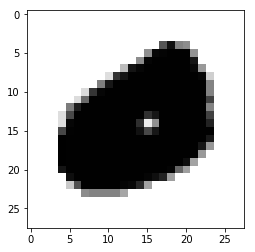

In [6]:
visualizeNumber(random.randint(0,len(X)))

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
import numpy as np

shuffle_indices = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_indices], y_train[shuffle_indices]

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/usr/local/homebrew/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([X[36000]])

array([ True], dtype=bool)

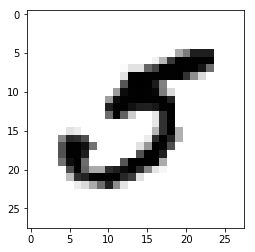

In [12]:
visualizeNumber(36000)

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9681
0.96395
0.90615


In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9681 ,  0.96395,  0.90615])

In [15]:
#confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52478,  2101],
       [ 1135,  4286]])

In [16]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.67105057147330516

In [17]:
recall_score(y_train_5, y_train_pred)

0.79062903523335182

In [18]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.72594850948509482

In [19]:
#decision thresholds
y_scores = sgd_clf.decision_function([X[36000]])
y_scores

array([ 199696.22551468])

In [20]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [21]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [23]:
y_scores.shape

(60000, 2)

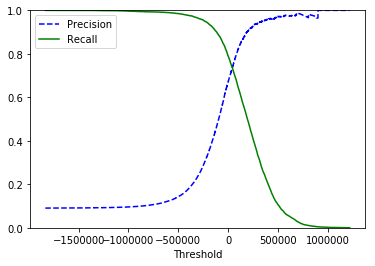

In [24]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores[:, 1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [25]:
y_train_pred_90 = (y_scores[:, 1] > 100000)
precision_score(y_train_5, y_train_pred_90)

0.82137834036568214

In [26]:
recall_score(y_train_5, y_train_pred_90)

0.64637520752628663

In [27]:
y_scores.shape

(60000, 2)

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores[:, 1])

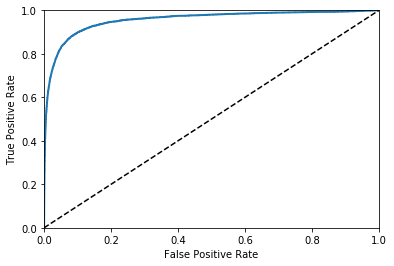

In [29]:
#roc (receiver operating characteristic) 
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores[:,1])

0.95574511136390217

In [31]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest =  cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [32]:
y_probas_forest

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [33]:
y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

/usr/local/homebrew/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))


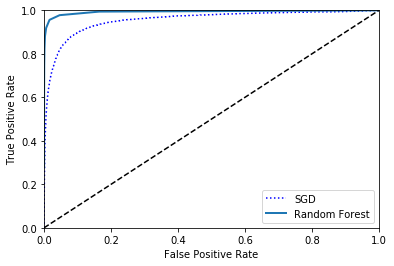

In [34]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [35]:
roc_auc_score(y_train_5, y_scores_forest)

0.99345473707500054

In [36]:
precision_score(y_train_5, y_scores_forest.round())

0.98604960141718334

In [37]:
recall_score(y_train_5, y_scores_forest.round())

0.82143515956465596

In [38]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X[36000]])

array([ 5.])

In [39]:
score_36000 = sgd_clf.decision_function([X[36000]])
score_36000

array([[  -42650.21018628,  -457669.19479843,  -382274.28904463,
          -83024.62508964,  -368483.17679268,   199696.22551468,
         -659898.88574289,  -374771.71087731, -1031177.21600953,
         -679290.9464884 ]])

In [40]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [41]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([X[36000]])


/usr/local/homebrew/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 3.])

In [42]:
len(ovo_clf.estimators_)

45

In [43]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([X[36000]])

array([ 5.])

In [44]:
forest_clf.predict_proba([X[36000]])

array([[ 0. ,  0. ,  0. ,  0.1,  0. ,  0.9,  0. ,  0. ,  0. ,  0. ]])

In [45]:
cross_val_score(forest_clf, X_test, y_test, scoring="accuracy")

array([ 0.85919712,  0.90669067,  0.91198558])

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
forest_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [47]:
cross_val_score(forest_clf, X_test, y_test, scoring = "accuracy")

array([ 0.85919712,  0.90669067,  0.91198558])

In [48]:
cross_val_score(forest_clf, X_train_scaled, y_train, scoring = "accuracy")

array([ 0.94221156,  0.94104705,  0.94059109])

In [49]:
y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv =3)

In [50]:
y_train_pred.shape

(60000,)

In [51]:
from sklearn.metrics import confusion_matrix 
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

array([[5808,    1,   16,    4,    8,   16,   32,    2,   34,    2],
       [   2, 6621,   36,   19,   13,    8,    6,   14,   14,    9],
       [  50,   25, 5646,   49,   39,    8,   25,   46,   56,   14],
       [  21,   19,  155, 5624,   12,  112,   12,   56,   84,   36],
       [  23,   21,   27,    1, 5549,    8,   35,   18,   32,  128],
       [  42,   22,   26,  208,   29, 4929,   49,   10,   62,   44],
       [  52,   21,   37,    5,   19,   65, 5690,    0,   29,    0],
       [  12,   30,   77,   24,   65,    9,    0, 5932,   13,  103],
       [  43,   44,   85,  125,   55,  102,   37,   10, 5273,   77],
       [  32,   15,   27,   90,  178,   35,    7,   99,   61, 5405]])

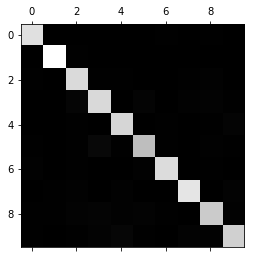

In [52]:
plt.matshow(conf_matrix, cmap = plt.cm.gray)
plt.show()

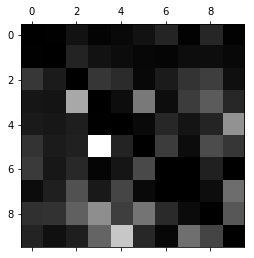

In [53]:
row_sums = conf_matrix.sum(axis = 1, keepdims = True)
normalized_conf_matrix = conf_matrix/row_sums

np.fill_diagonal(normalized_conf_matrix, 0)
plt.matshow(normalized_conf_matrix, cmap = plt.cm.gray)
plt.show()

In [54]:
#multi label classification
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
#slice the two columns together
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
#predict the number 5
knn_clf.predict([X[36000]])

array([[False,  True]], dtype=bool)

In [ ]:
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv = 3)
f1_score(y_train, y_train_pred, average = "macro")
f1_score